In [1]:
# Libraries
library(tidyverse)
library(viridis)
library(patchwork)
library(hrbrthemes)
library(circlize)

── Attaching packages ───────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circul

In [23]:
filename <- '../results/income_collaboration.csv'
data <- read.csv(filename)/1e4

colnames(data) <- c('China', 'High Income', 'Lower Middle', 'Low Income', 'Upper Middle', 'UN Undefined')
rownames(data) <- colnames(data)
dorder <- c(2,5,1,3,4,6)
data <- data[dorder, dorder]
data

,High Income,Upper Middle,China,Lower Middle,Low Income,UN Undefined
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High Income,16.0485,0.9489,0.7312,0.7792,0.1437,0.1013
Upper Middle,0.8047,2.6220,0.0258,0.0968,0.0221,0.0221
China,1.0733,0.0479,4.2182,0.1260,0.0084,0.0039
Lower Middle,0.5170,0.0844,0.0504,1.5566,0.0273,0.0017
Low Income,0.0501,0.0138,0.0015,0.0214,0.0410,0.0003
UN Undefined,0.0979,0.0202,0.0011,0.0029,0.0001,0.2355


In [53]:
filename <- '../results/region_collaboration.csv'
data <- (read.csv(filename)/1e4)

colnames(data) <- c('AUNZ', 'C. Asia', 'China', 'E. Asia', 'Europe', 'LATAM', 'MENA', 'S. Asia', 'SE Asia', 'SubSah Africa', 'USCA', 'Other')
rownames(data) <- colnames(data)
dorder <- c(11,3,5,1,4,8,9,2,7,10,6,12)
data <- data[dorder, dorder]
data <- data[-12,-12]
data

,USCA,China,Europe,AUNZ,E. Asia,S. Asia,SE Asia,C. Asia,MENA,SubSah Africa,LATAM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USCA,4.1148,0.3390,0.5413,0.1012,0.1504,0.0632,0.0539,0.0222,0.0579,0.0645,0.1997
China,0.5669,4.2182,0.3556,0.1312,0.1199,0.0817,0.0338,0.0056,0.0263,0.0299,0.0203
Europe,0.6835,0.2189,7.5315,0.1987,0.1601,0.1096,0.1000,0.0635,0.1809,0.2392,0.3246
AUNZ,0.1027,0.0646,0.1714,0.8294,0.0206,0.0299,0.0302,0.0078,0.0098,0.0150,0.0249
E. Asia,0.1756,0.1116,0.1472,0.0312,2.3652,0.0728,0.0949,0.0069,0.0324,0.0185,0.0139
S. Asia,0.0700,0.0343,0.0994,0.0275,0.0405,1.2769,0.0140,0.0053,0.0563,0.0162,0.0128
SE Asia,0.0342,0.0193,0.0561,0.0244,0.0444,0.0215,0.2400,0.0041,0.0076,0.0106,0.0037
C. Asia,0.0249,0.0045,0.0601,0.0084,0.0057,0.0043,0.0029,0.3346,0.0042,0.0012,0.0033
MENA,0.0378,0.0098,0.1359,0.0072,0.0163,0.0331,0.0038,0.0035,0.2631,0.0077,0.0045


In [65]:
sum(data['USCA',]) # row
sum(data[,'USCA']) # column

[1] 5.7081

[1] 6.0614

In [54]:
# I need a long format
data_long <- data %>%
  rownames_to_column %>%
  gather(key = 'key', value = 'value', -rowname)
data_long

rowname,key,value
<chr>,<chr>,<dbl>
USCA,USCA,4.1148
China,USCA,0.5669
Europe,USCA,0.6835
AUNZ,USCA,0.1027
E. Asia,USCA,0.1756
S. Asia,USCA,0.0700
SE Asia,USCA,0.0342
C. Asia,USCA,0.0249
MENA,USCA,0.0378


In [10]:
mycolor <- viridis::viridis(6, alpha = 1, begin = 0, end = 1, option = "D")
foo <- paste(paste('"', mycolor,'"', sep=''), collapse=',')
writeLines(foo,"filename.txt")

In [55]:
mycolor <- viridis::viridis(nrow(data), alpha = 1, begin = 0, end = 1, option = "D")
mycolor <- mycolor[base::sample(1:nrow(data))]
mycolor

[1] "#35608DFF" "#2A788EFF" "#43BF71FF" "#FDE725FF" "#482576FF" "#BBDF27FF"
 [7] "#22A884FF" "#21908CFF" "#414487FF" "#7AD151FF" "#440154FF"

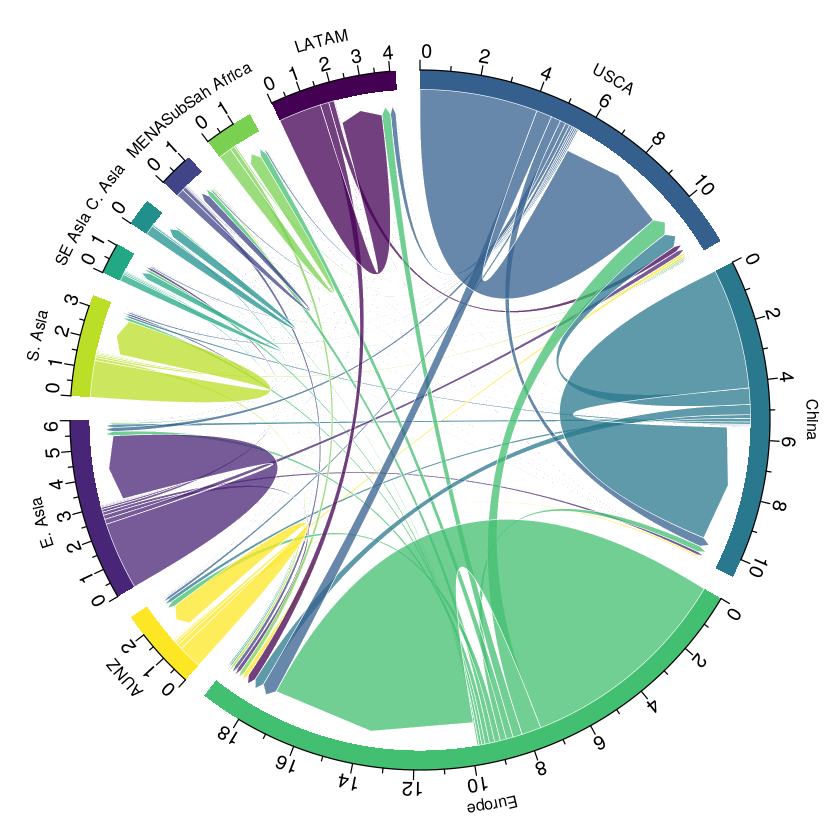

In [56]:
# parameters
circos.clear()
circos.par(start.degree = 90, gap.degree = 4, track.margin = c(-0.1, 0.1), points.overflow.warning = FALSE)
par(mar = rep(0, 4))

# Base plot
foo <- circlize::chordDiagram(
  x = data_long, 
  grid.col = mycolor,
  transparency = 0.25,
  directional = 1,
  direction.type = c("arrows", "diffHeight"), 
  diffHeight  = -0.04,
  annotationTrack = "grid", 
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "big.arrow", 
  link.sort = TRUE, 
  link.largest.ontop = TRUE,
  link.border = 0,
  link.lwd = 0.5,
  link.lty = 1)

bar <- circos.trackPlotRegion(
  track.index = 1, 
  bg.border = NA, 
  panel.fun = function(x, y) {
    
    xlim = get.cell.meta.data("xlim")
    sector.index = get.cell.meta.data("sector.index")
    
    # Add names to the sector. 
    circos.text(
      x = mean(xlim), 
      y = 3.2,
      labels = sector.index, 
      facing = "bending", 
      cex = 0.8
    )
    
    # Add graduation on axis
    circos.axis(
      h = "top", 
      major.at = seq(from = 0, to = xlim[2], by = ifelse(test = xlim[2]>10, yes = 2, no = 1)), 
      minor.ticks = 1, 
      major.tick.length = 0.5,
      labels.niceFacing = FALSE)
  }
)

In [37]:
get.cell.meta.data("xlim")

min.data max.data 
  0.0000   0.7225

In [40]:
get.cell.meta.data('xcenter')

max.data 
 0.36125

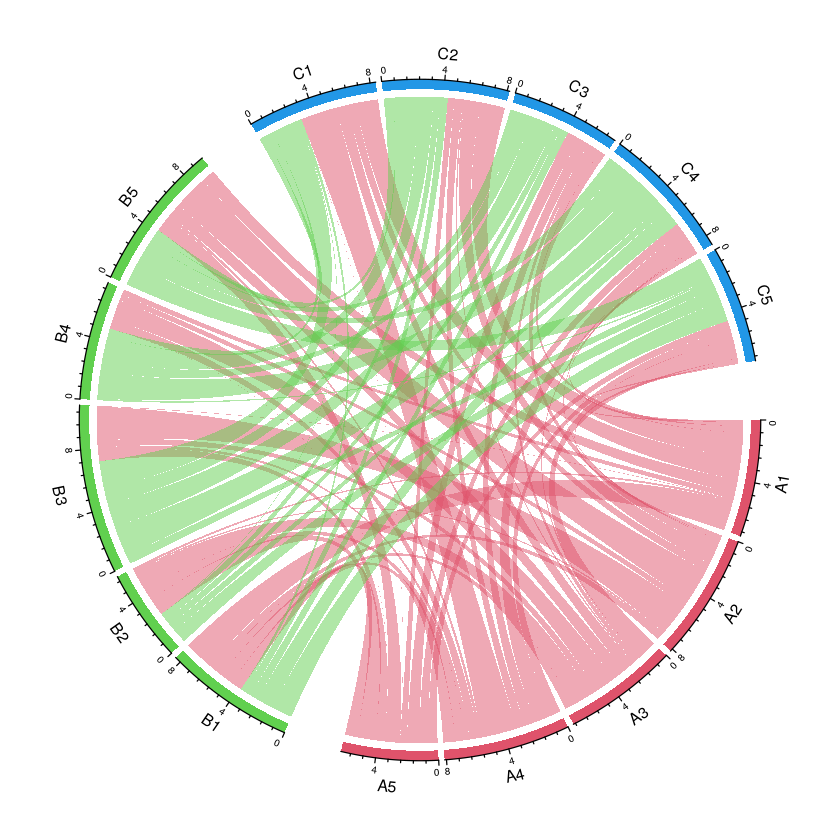

In [5]:
grid.col = structure(c(rep(2, 5), rep(3, 5), rep(4, 5)),
                names = c(paste0("A", 1:5), paste0("B", 1:5), paste0("C", 1:5)))
chordDiagram(mat, group = group, grid.col = grid.col)

Warning message:
“'gap.degree' can only be modified before `circos.initialize`, or maybe
you forgot to call `circos.clear` in your last plot.”


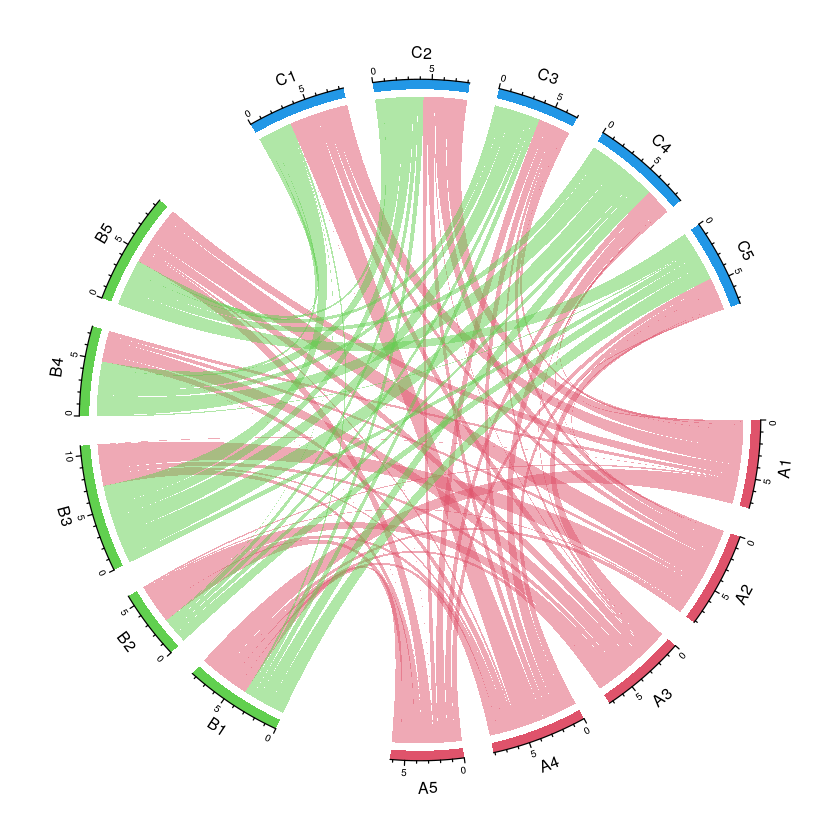

In [6]:
group = structure(gsub("\\d", "", nm), names = nm)
chordDiagram(mat, group = group, grid.col = grid.col, big.gap = 20, small.gap = 5)

Warning message:
“'gap.degree' can only be modified before `circos.initialize`, or maybe
you forgot to call `circos.clear` in your last plot.”


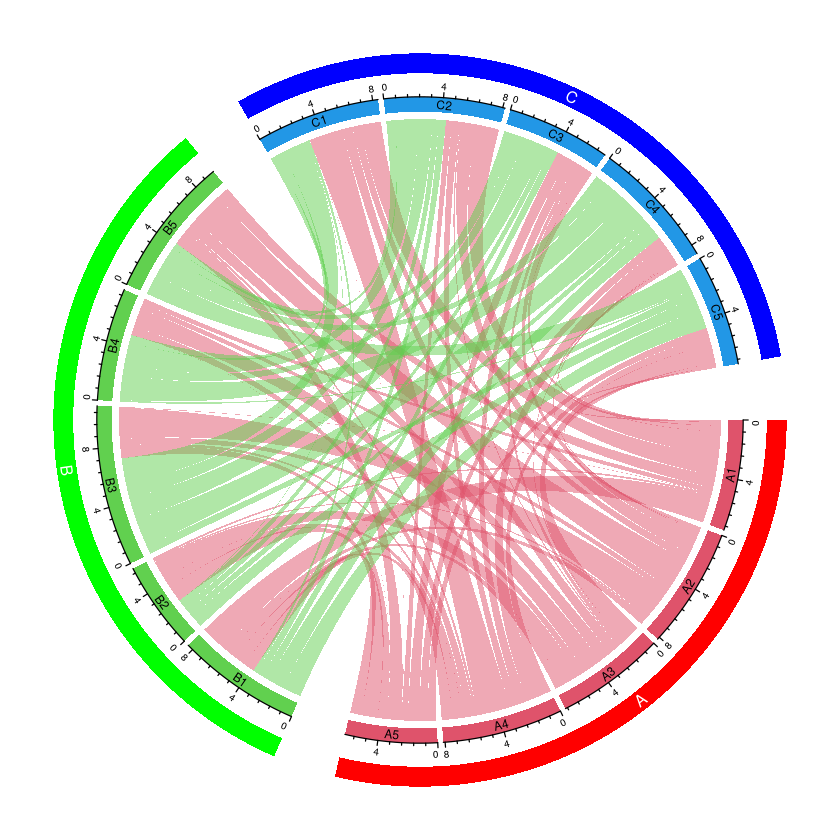

In [7]:
group = structure(gsub("\\d", "", nm), names = nm)
chordDiagram(mat, group = group, grid.col = grid.col,
    annotationTrack = c("grid", "axis"),
    preAllocateTracks = list(
        track.height = mm_h(4),
        track.margin = c(mm_h(4), 0)
))
circos.track(track.index = 2, panel.fun = function(x, y) {
    sector.index = get.cell.meta.data("sector.index")
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    circos.text(mean(xlim), mean(ylim), sector.index, cex = 0.6, niceFacing = TRUE)
}, bg.border = NA)

highlight.sector(rownames(mat1), track.index = 1, col = "red", 
    text = "A", cex = 0.8, text.col = "white", niceFacing = TRUE)
highlight.sector(colnames(mat1), track.index = 1, col = "green", 
    text = "B", cex = 0.8, text.col = "white", niceFacing = TRUE)
highlight.sector(colnames(mat2), track.index = 1, col = "blue", 
    text = "C", cex = 0.8, text.col = "white", niceFacing = TRUE)

In [36]:
### Define ranges of circos sectors and their colors (both of the sectors and the links)
df1$xmin <- 0
df1$xmax <- rowSums(m) + colSums(m)
n <- nrow(df1)
df1$rcol<-rgb(df1$r, df1$g, df1$b, max = 255)
df1$lcol<-rgb(df1$r, df1$g, df1$b, alpha=200, max = 255)

In [37]:
df1

order,country,r,g,b,xmin,xmax,rcol,lcol
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Ausralia,255,51,51,0,62.7002,#FF3333,#FF3333C8
2,India,255,153,51,0,37.5002,#FF9933,#FF9933C8
3,China,255,255,51,0,47.3002,#FFFF33,#FFFF33C8
4,Japan,153,255,51,0,58.5002,#99FF33,#99FF33C8
5,Thailand,51,255,51,0,36.8002,#33FF33,#33FF33C8
6,Malaysia,51,255,153,0,38.4002,#33FF99,#33FF99C8


Note: 1 point is out of plotting region in sector 'Ausralia', track
'1'.



ERROR: Error in circos.axis(labels.cex = 0.6, direction = "outside", major.at = seq(from = 0, : unused argument (labels.away.percentage = 0.15)


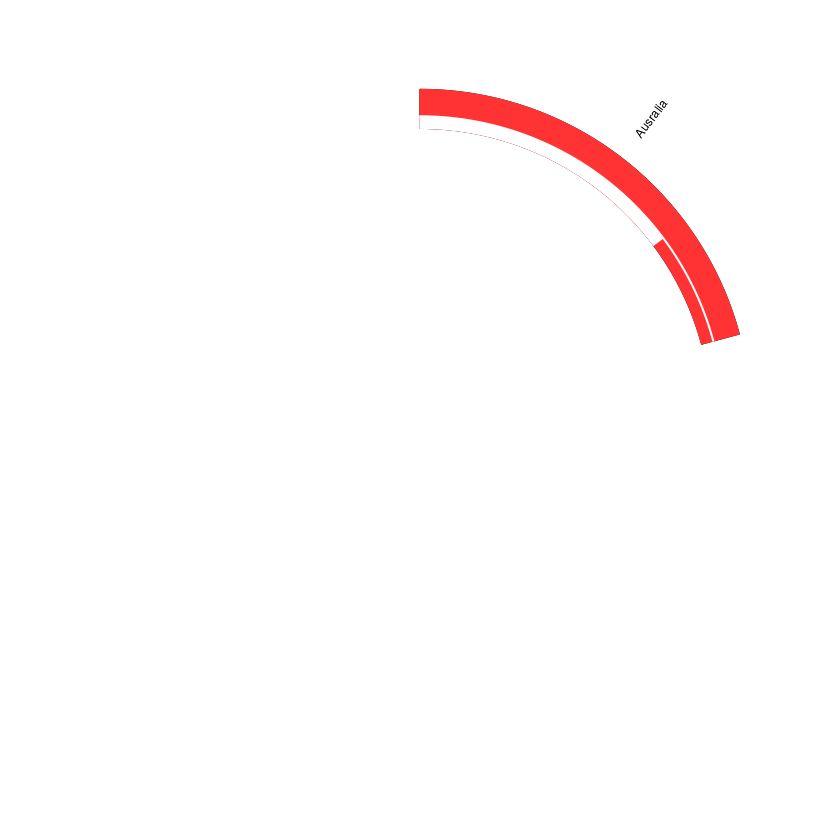

In [38]:
### Plot sectors (outer part)
par(mar=rep(0,4))
circos.clear()

### Basic circos graphic parameters
circos.par(cell.padding=c(0,0,0,0), track.margin=c(0,0.15), start.degree = 90, gap.degree =4)
 
### Sector details
circos.initialize(factors = df1$country, xlim = cbind(df1$xmin, df1$xmax))

### Plot sectors
circos.trackPlotRegion(ylim = c(0, 1), factors = df1$country, track.height=0.1,
                      #panel.fun for each sector
                      panel.fun = function(x, y) {
                      #select details of current sector
                      name = get.cell.meta.data("sector.index")
                      i = get.cell.meta.data("sector.numeric.index")
                      xlim = get.cell.meta.data("xlim")
                      ylim = get.cell.meta.data("ylim")
 
                      #text direction (dd) and adjusmtents (aa)
                      theta = circlize(mean(xlim), 1.3)[1, 1] %% 360
                      dd <- ifelse(theta < 90 || theta > 270, "clockwise", "reverse.clockwise")
                      aa = c(1, 0.5)
                      if(theta < 90 || theta > 270)  aa = c(0, 0.5)
 
                      #plot country labels
                      circos.text(x=mean(xlim), y=1.7, labels=name, facing = dd, cex=0.6,  adj = aa)
 
                      #plot main sector
                      circos.rect(xleft=xlim[1], ybottom=ylim[1], xright=xlim[2], ytop=ylim[2], 
                                  col = df1$rcol[i], border=df1$rcol[i])
 
                      #blank in part of main sector
                      circos.rect(xleft=xlim[1], ybottom=ylim[1], xright=xlim[2]-rowSums(m)[i], ytop=ylim[1]+0.3, 
                                  col = "white", border = "white")
 
                      #white line all the way around
                      circos.rect(xleft=xlim[1], ybottom=0.3, xright=xlim[2], ytop=0.32, col = "white", border = "white")
 
                      #plot axis
                      circos.axis(labels.cex=0.6, direction = "outside", major.at=seq(from=0,to=floor(df1$xmax)[i],by=5), 
                                  minor.ticks=1, labels.away.percentage = 0.15)
                    })

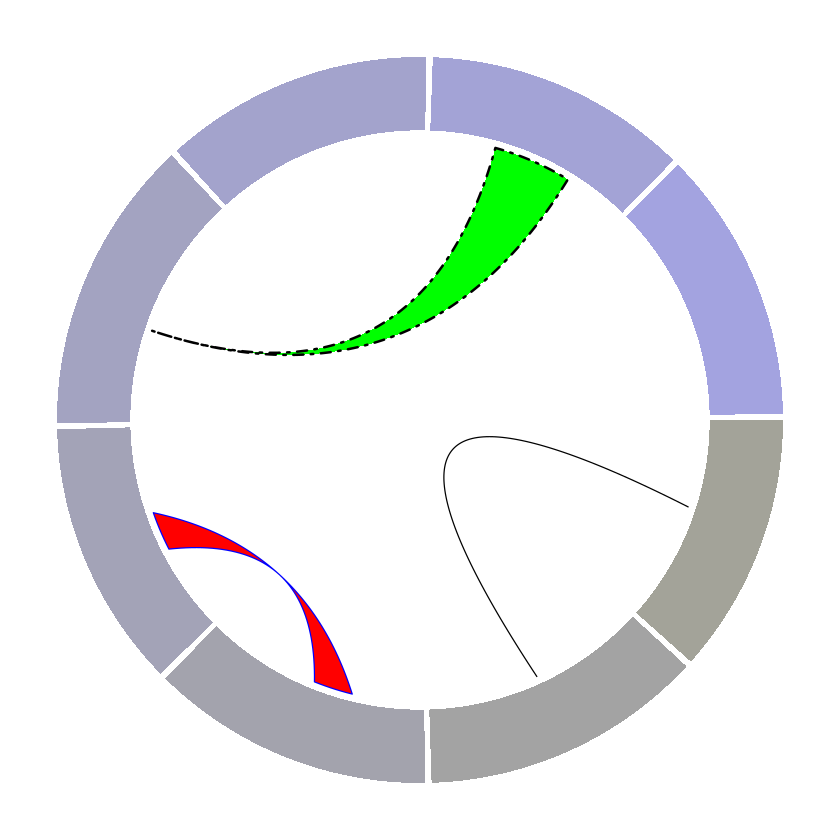

In [14]:
set.seed(123)
data = data.frame(
    factor = sample(letters[1:8], 1000, replace = TRUE),
    x = rnorm(1000), 
    y = runif(1000)
    )
 
# Initialize the plot.
par(mar = c(1, 1, 1, 1) ) 
circos.initialize(factors = data$factor, x = data$x )
 
# Build the regions of track #1
circos.trackPlotRegion(factors = data$factor, y=data$y , bg.col = rgb(0.1,0.1,seq(0,1,0.1),0.4) , bg.border = NA)
 
# Add a link between a point and another
circos.link("a", 0, "b", 0, h = 0.65)
 
# Add a link between a point and a zone
circos.link("e", 0, "g", c(-1,1), col = "green", lwd = 2, lty = 4, border="black" )
 
# Add a link between a zone and another
circos.link("c", c(-0.5, 0.5), "d", c(-0.5,0.5), col = "red", border = "blue", h = 0.2)